In [2]:
#First we import everything
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [3]:
df_churndata1 = pd.read_csv("TelcoCustomerChurn[MODIFIED].csv", index_col=0)
df_churndata1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,0.115423,0.001275,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,1,1,...,1,0,0,0,1,0,1,0.385075,0.215867,0
2,3668-QPYBK,1,0,0,0,0.014085,1,0,1,1,...,0,0,0,0,0,1,1,0.354229,0.010310,1
3,7795-CFOCW,1,0,0,0,0.619718,0,0,1,1,...,1,1,0,0,1,0,0,0.239303,0.210241,0
4,9237-HQITU,0,0,0,0,0.014085,1,0,1,0,...,0,0,0,0,0,1,0,0.521891,0.015330,1


In [4]:
# We store our churn column in a separate variable and drop it from dataset

churn = df_churndata1.pop('Churn')
churn[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [5]:
df_churndata1 = df_churndata1.drop(columns="customerID")

In [6]:
#split the data into training and testing

data_train, data_test, target_train, target_test = train_test_split(df_churndata1, churn, test_size = 0.25)

In [7]:
#Baseline tree classifier

tree_churn = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_churn.fit(data_train, target_train)
tree_churn.score(data_test, target_test)

0.7810011376564278

In [8]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, tree_churn.feature_importances_):
    print("{} -> {}".format(feature, importance))

gender -> 0.0
SeniorCitizen -> 0.007131261968983305
Partner -> 0.0
Dependents -> 0.0
tenure -> 0.20706450211659228
PhoneService -> 0.013086173051462863
MultipleLines -> 0.0
InternetService -> 0.018499510373017232
OnlineSecurity -> 0.0
OnlineBackup -> 0.0
DeviceProtection -> 0.0
TechSupport -> 0.010462708905286538
StreamingTV -> 0.0
StreamingMovies -> 0.006552203711553235
Contract -> 0.5250771709916995
PaperlessBilling -> 0.0
PaymentMethod -> 0.0
MonthlyCharges -> 0.1692219951247794
TotalCharges -> 0.04290447375662563


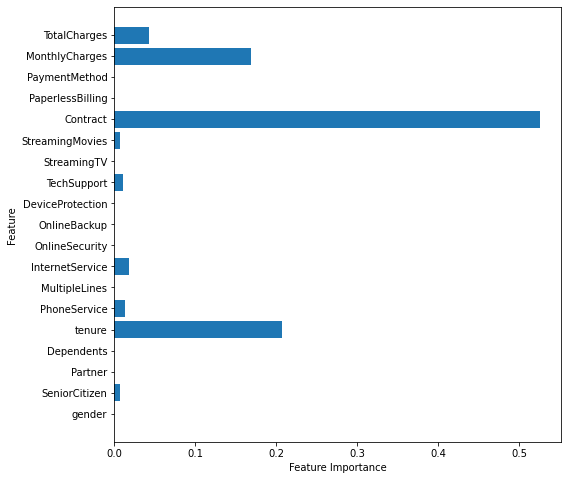

In [9]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_train.columns.values)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree_churn)

In [10]:
#prediction with basic tree

pred = tree_churn.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))


# The results will vary but I ran it once and got the below
#True positives = 1190
#True negatives = 209


#false positives = 112
#false negatiaves = 247

[[1172  114]
 [ 271  201]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1286
           1       0.64      0.43      0.51       472

    accuracy                           0.78      1758
   macro avg       0.73      0.67      0.68      1758
weighted avg       0.77      0.78      0.77      1758



In [11]:
churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [12]:
#bagged trees

bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth= 5), n_estimators=20)

In [13]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [14]:
bagged_tree.score(data_train, target_train)

0.8096321577550246

In [15]:
bagged_tree.score(data_test, target_test)

0.7946530147895335

In [16]:
#Random Forests

forest = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features=10)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [19]:
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=1000)

In [20]:
forest.score(data_train, target_train)

0.8086841107318923

In [21]:
forest.score(data_test, target_test)

0.7923777019340159

In [22]:
pred = forest.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[1172  114]
 [ 251  221]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1286
           1       0.66      0.47      0.55       472

    accuracy                           0.79      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



<AxesSubplot:>

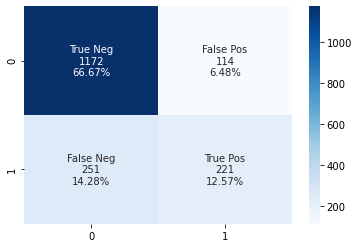

In [100]:
# pred = forest1.predict(data_test)
cf_matrix = confusion_matrix(target_test, pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

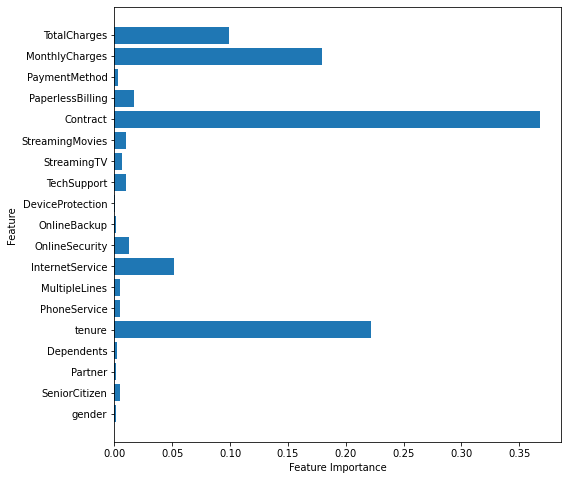

In [101]:
plot_feature_importances(forest)

In [103]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, forest.feature_importances_):
    print("{} -> {}".format(feature, importance))

gender -> 0.0014478619806853382
SeniorCitizen -> 0.00487941180842567
Partner -> 0.0009169613215620583
Dependents -> 0.001957420432591272
tenure -> 0.22145760593155567
PhoneService -> 0.005107093820912705
MultipleLines -> 0.004453465653625628
InternetService -> 0.05135528611267438
OnlineSecurity -> 0.0126500185588455
OnlineBackup -> 0.0015610563892407513
DeviceProtection -> 0.0007731268307459363
TechSupport -> 0.010160210643028699
StreamingTV -> 0.0065320686734305885
StreamingMovies -> 0.009677713529033478
Contract -> 0.3675794974129987
PaperlessBilling -> 0.017275924306348132
PaymentMethod -> 0.003028497085869448
MonthlyCharges -> 0.17980222423048897
TotalCharges -> 0.09938455527793702


In [104]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(forest.feature_importances_,3)})

In [105]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')

<AxesSubplot:xlabel='feature'>

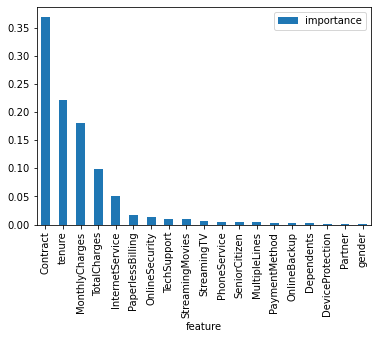

In [106]:
importances.plot.bar()

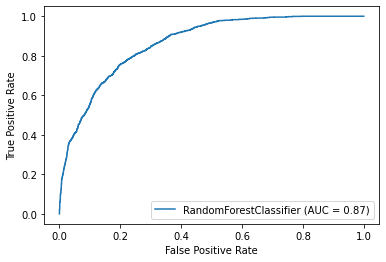

In [23]:
# plotting the ROC Curve

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plot_roc_curve(forest, data_train, target_train)

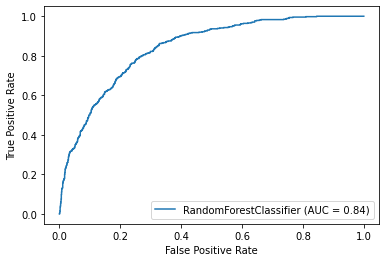

In [24]:
plot_roc_curve(forest, data_test, target_test)

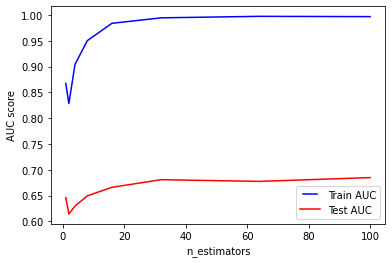

In [25]:
#num forests
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
# I removed 200, 500, 1000 because it was just leading to 1.00, maybe keep it in?
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

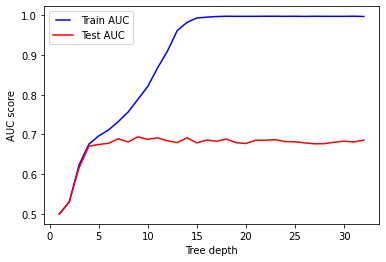

In [26]:
# maxdepth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

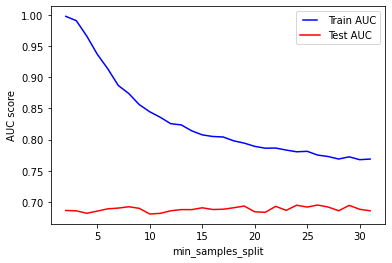

In [33]:
#nume_samples_split - min_samples_split
min_samples_split = np.arange(2,32,1)
train_results = []
test_results = []
for min_sample_split in min_samples_split:
   rf = RandomForestClassifier(min_samples_split=min_sample_split, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_samples_split, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_samples_split, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

In [28]:
max_samples_split = np.arange(2,32,1)
max_samples_split

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

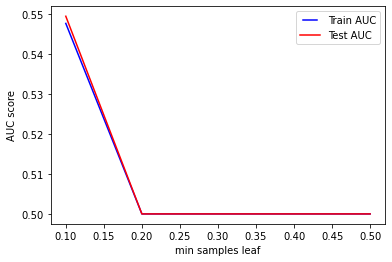

In [29]:
#maxleaves
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

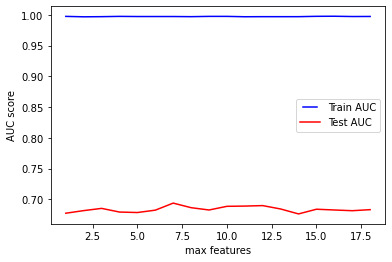

In [30]:
#maxfeatures
max_features = list(range(1,df_churndata1.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [31]:
max_features = list(range(1,df_churndata1.shape[1]))
max_features

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [63]:
# I want to try RandomGridSearchCV

from sklearn.model_selection import RandomizedSearchCV
import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 200)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 10, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [1,
               3,
               5,
               7,
               9,
               11,
               13,
               15,
               17,
               19,
               21,
               23,
               25,
               27,
               29,
               31,
               33,
               35,
               37,
               39,
               41,
               43,
               45,
               47,
               49,
               51,
               53,
               55,
               57,
               59,
               61,
               63,
               65,
               67,
               69,
               71,
               73,
               75,
               77,
               79,
               81,
               83,
               85,
               87,
               89,
               91,
               93,
               95,
               97,
               100,
               None],
 'm

In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train, target_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49, 51,
                                                      53, 55, 57, 59, ...],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': 

In [67]:
rf_random.best_params_

{'n_estimators': 143,
 'min_samples_split': 5,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 45,
 'bootstrap': True}

In [93]:
#we will try the recommendation above

forest1 = RandomForestClassifier(n_estimators=143, max_depth=45, max_features='auto', min_samples_split=5, min_samples_leaf=9, bootstrap=True)
forest1.fit(data_train, target_train)
forest1.score(data_train, target_train)

0.8458475540386803

In [94]:
forest1.score(data_test, target_test)

0.7912400455062572

In [98]:
pred1 = forest1.predict(data_test)
cf_matrix = confusion_matrix(target_test, pred1)

<AxesSubplot:>

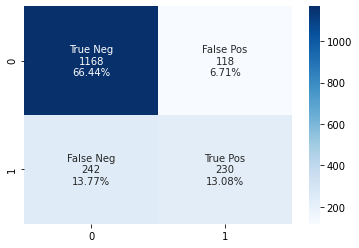

In [99]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

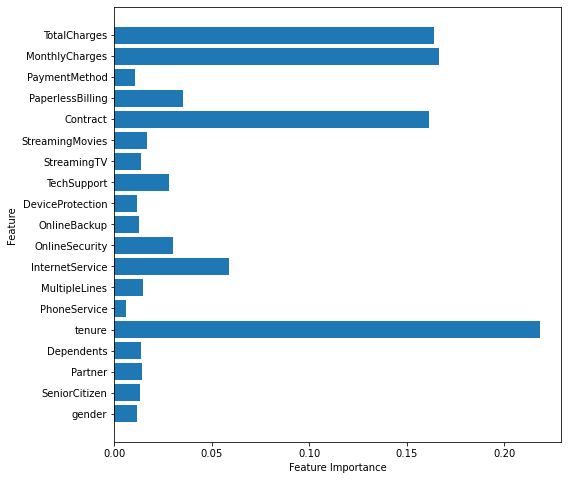

In [102]:
plot_feature_importances(forest1)

<AxesSubplot:xlabel='feature'>

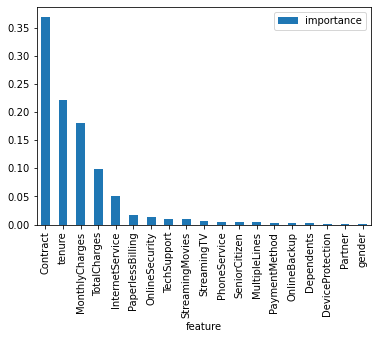

In [107]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
